In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
states = ["NSW", "QLD", "SA", "TAS", "VIC"]

for state in states:
    # Read the CSV file for the state
    df = pd.read_csv(f"../data/nem/combined/{state}_combined.csv")

    # Convert SETTLEMENTDATE to datetime
    df["SETTLEMENTDATE"] = pd.to_datetime(df["SETTLEMENTDATE"])

    # Set index
    df.set_index("SETTLEMENTDATE", inplace=True)

    # Resample to hourly and take mean of numeric columns
    hourly_df = df.resample("1h").agg({"TOTALDEMAND": "mean", "RRP": "mean"})

    # Reset index to get SETTLEMENTDATE as a column again
    hourly_df.reset_index(inplace=True)

    # Add REGION column manually
    hourly_df["REGION"] = f"{state}1"

    # Save to CSV
    output_path = f"../data/nem/combined/{state}_hourly.csv"
    hourly_df.to_csv(output_path, index=False)

    print(f"Saved hourly data for {state} to {output_path}")

Saved hourly data for NSW to ../data/nem/combined/NSW_hourly.csv
Saved hourly data for QLD to ../data/nem/combined/QLD_hourly.csv
Saved hourly data for SA to ../data/nem/combined/SA_hourly.csv
Saved hourly data for TAS to ../data/nem/combined/TAS_hourly.csv
Saved hourly data for VIC to ../data/nem/combined/VIC_hourly.csv


In [3]:
states = ["NSW", "QLD", "SA", "TAS", "VIC"]

for state in states:
    # Load hourly energy data
    energy_path = f"../data/nem/combined/{state}_hourly.csv"
    energy_df = pd.read_csv(energy_path)
    energy_df["SETTLEMENTDATE"] = pd.to_datetime(energy_df["SETTLEMENTDATE"])

    # Load weather data
    weather_path = f"../data/weather/{state}_weather_data.csv"
    weather_df = pd.read_csv(weather_path)
    weather_df["datetime"] = pd.to_datetime(weather_df["datetime"])
    weather_df.rename(columns={"datetime": "SETTLEMENTDATE"}, inplace=True)

    # Merge on SETTLEMENTDATE
    merged_df = pd.merge(energy_df, weather_df, on="SETTLEMENTDATE", how="inner")

    # Save the merged DataFrame
    output_path = f"../data/nem/merged/{state}_hourly_merged.csv"
    merged_df.to_csv(output_path, index=False)

    print(f"Merged and saved data for {state} to {output_path}")

Merged and saved data for NSW to ../data/nem/merged/NSW_hourly_merged.csv
Merged and saved data for QLD to ../data/nem/merged/QLD_hourly_merged.csv
Merged and saved data for SA to ../data/nem/merged/SA_hourly_merged.csv
Merged and saved data for TAS to ../data/nem/merged/TAS_hourly_merged.csv
Merged and saved data for VIC to ../data/nem/merged/VIC_hourly_merged.csv


In [ ]:
holiday_dict = {
    "NSW": [
        "2024-04-01",  # Easter Monday
        "2024-04-25",  # Anzac Day
        "2024-06-10",  # King's Birthday
        "2024-10-07",  # Labour Day
        "2024-12-25",  # Christmas Day
        "2024-12-26",  # Boxing Day
        "2025-01-01",  # New Year's Day
        "2025-01-27",  # Australia Day (observed)
        "2025-04-18",  # Good Friday
        "2025-04-19",  # Easter Saturday
        "2025-04-20",  # Easter Sunday
        "2025-04-21",  # Easter Monday
        "2025-04-25",  # Anzac Day
    ],
    "QLD": [
        "2024-04-01",  # Easter Monday
        "2024-04-25",  # Anzac Day
        "2024-05-06",  # Labour Day
        "2024-10-07",  # King's Birthday
        "2024-12-25",  # Christmas Day
        "2024-12-26",  # Boxing Day
        "2025-01-01",  # New Year's Day
        "2025-01-27",  # Australia Day (observed)
        "2025-05-05",  # Labour Day
        "2025-04-18",  # Good Friday
        "2025-04-19",  # Easter Saturday
        "2025-04-20",  # Easter Sunday
        "2025-04-21",  # Easter Monday
        "2025-04-25",  # Anzac Day
    ],
    "SA": [
        "2024-04-01",  # Easter Monday
        "2024-04-25",  # Anzac Day
        "2024-06-10",  # King's Birthday
        "2024-10-07",  # Labour Day
        "2024-12-25",  # Christmas Day
        "2024-12-26",  # Proclamation Day
        "2025-01-01",  # New Year's Day
        "2025-01-27",  # Australia Day (observed)
        "2025-03-10",  # Adelaide Cup Day
        "2025-04-18",  # Good Friday
        "2025-04-19",  # Easter Saturday
        "2025-04-20",  # Easter Sunday
        "2025-04-21",  # Easter Monday
        "2025-04-25",  # Anzac Day
    ],
    "TAS": [
        "2024-04-01",  # Easter Monday
        "2024-04-25",  # Anzac Day
        "2024-06-10",  # King's Birthday
        "2024-12-25",  # Christmas Day
        "2024-12-26",  # Boxing Day
        "2025-01-01",  # New Year's Day
        "2025-01-27",  # Australia Day (observed)
        "2025-04-18",  # Good Friday
        "2025-04-21",  # Easter Monday
        "2025-04-25",  # Anzac Day
    ],
    "VIC": [
        "2024-04-01",  # Easter Monday
        "2024-04-25",  # Anzac Day
        "2024-06-10",  # King's Birthday
        "2024-09-27",  # AFL Grand Final Eve
        "2024-11-05",  # Melbourne Cup
        "2024-12-25",  # Christmas Day
        "2024-12-26",  # Boxing Day
        "2025-01-01",  # New Year's Day
        "2025-01-27",  # Australia Day (observed)
        "2025-03-10",  # Labour Day
        "2025-04-18",  # Good Friday
        "2025-04-19",  # Easter Saturday
        "2025-04-20",  # Easter Sunday
        "2025-04-21",  # Easter Monday
        "2025-04-25",  # Anzac Day
    ],
}

# Load the UIGF (solar/wind forecasts) + NETINTERCHANGE data

vre_df = pd.read_csv("../data/nem/ugif/nem_ugif_interchange_data.csv")

vre_df["SETTLEMENTDATE"] = pd.to_datetime(vre_df["SETTLEMENTDATE"])


for state in states:

    region_id = f"{state}1"


    # Filter for state and resample to hourly

    state_vre = vre_df[vre_df["REGIONID"] == region_id].copy()

    state_vre.set_index("SETTLEMENTDATE", inplace=True)

    state_vre_hourly = (

        state_vre[["SS_SOLAR_UIGF", "SS_WIND_UIGF", "NETINTERCHANGE"]]

        .resample("1h")

        .mean()

    )

    state_vre_hourly.reset_index(inplace=True)


    # Load energy + weather data

    base_path = f"../data/nem/merged/{state}_hourly_merged.csv"

    merged_df = pd.read_csv(base_path)

    merged_df["SETTLEMENTDATE"] = pd.to_datetime(merged_df["SETTLEMENTDATE"])


    # Merge UIGF + NETINTERCHANGE

    final_df = pd.merge(merged_df, state_vre_hourly, on="SETTLEMENTDATE", how="left")


    # Filter to date range

    final_df = final_df[

        (final_df["SETTLEMENTDATE"] >= "2024-04-01 00:00:00")

        & (final_df["SETTLEMENTDATE"] <= "2025-03-31 23:00:00")

    ]


    # Feature engineering

    final_df["hour"] = final_df["SETTLEMENTDATE"].dt.hour

    final_df["dayofweek"] = final_df["SETTLEMENTDATE"].dt.dayofweek

    final_df["month"] = final_df["SETTLEMENTDATE"].dt.month

    final_df["is_weekend"] = final_df["dayofweek"].isin([5, 6]).astype(int)


    # Create a holiday set for current state

    state_holidays = set(pd.to_datetime(holiday_dict[state]).date)


    # Add is_holiday column

    final_df["is_holiday"] = (

        final_df["SETTLEMENTDATE"].dt.date.isin(state_holidays).astype(int)

    )


    # Compute robust normalization parameters for RRP

    rrp_median = final_df["RRP"].median()

    rrp_mad = np.median(np.abs(final_df["RRP"] - rrp_median)) * 1.4826


    # Store for future inverse transformation

    final_df["rrp_median"] = rrp_median

    final_df["rrp_mad"] = rrp_mad


    # Apply asinh transformation

    final_df["asinh_RRP"] = np.arcsinh((final_df["RRP"] - rrp_median) / rrp_mad)


    # Generate lag features

    for lag in [1] + [24 * day for day in range(1, 8)]:

        final_df[f"RRP_lag_{lag}"] = final_df["RRP"].shift(lag)

        final_df[f"asinh_RRP_lag_{lag}"] = final_df["asinh_RRP"].shift(lag)

        final_df[f"TOTALDEMAND_lag_{lag}"] = final_df["TOTALDEMAND"].shift(lag)


    # Drop rows with NA values due to lagging

    na_sum = final_df.isna().sum().sum()

    if na_sum == 2019:

        print(f"Expected 2019 NA values found in {state} data after lagging.")

        print(f"{final_df.isna().sum().sum()} NAs found after lagging {state} data.")

        final_df.dropna(inplace=True)

    else:

        print(f"Warning: {na_sum} NA values found in {state} data before lagging.")


    # Time of Day Sinusoidal Encoding

    final_df["hour_sin"] = np.sin(2 * np.pi * final_df["hour"] / 24)

    final_df["hour_cos"] = np.cos(2 * np.pi * final_df["hour"] / 24)


    # Save final enriched and featurised file

    output_path = f"../data/featurised/{state}_test_final.csv"

    final_df.to_csv(output_path, index=False)


    print(f"Final enriched + featurised file saved for {state}: {output_path}")

Expected 2019 NA values found in NSW data after lagging.
2019 NAs found after lagging NSW data.
Final enriched + featurised file saved for NSW: ../data/featurised/NSW_test_final.csv
Expected 2019 NA values found in QLD data after lagging.
2019 NAs found after lagging QLD data.
Final enriched + featurised file saved for QLD: ../data/featurised/QLD_test_final.csv
Expected 2019 NA values found in SA data after lagging.
2019 NAs found after lagging SA data.
Final enriched + featurised file saved for SA: ../data/featurised/SA_test_final.csv
Expected 2019 NA values found in TAS data after lagging.
2019 NAs found after lagging TAS data.
Final enriched + featurised file saved for TAS: ../data/featurised/TAS_test_final.csv
Expected 2019 NA values found in VIC data after lagging.
2019 NAs found after lagging VIC data.
Final enriched + featurised file saved for VIC: ../data/featurised/VIC_test_final.csv


<Axes: xlabel='SETTLEMENTDATE'>

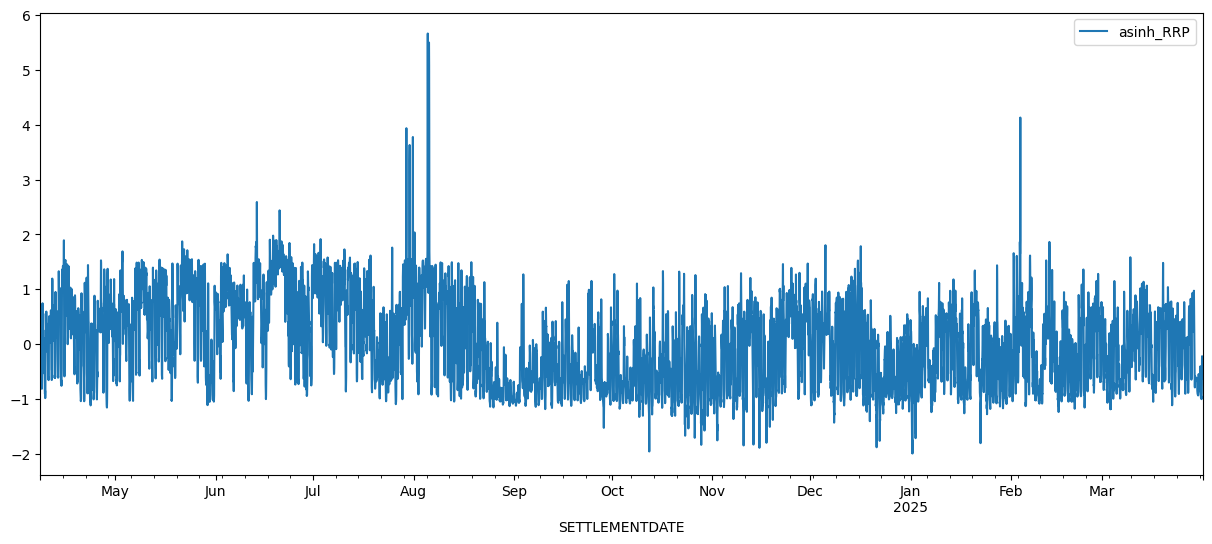

In [15]:
final_df.plot(x="SETTLEMENTDATE", y=["asinh_RRP"], figsize=(15, 6))

In [5]:
# Load the NSW final data
sa_df = pd.read_csv("../data/featurised/SA_final.csv", parse_dates=["SETTLEMENTDATE"])

sa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8592 entries, 0 to 8591
Data columns (total 46 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   SETTLEMENTDATE       8592 non-null   datetime64[ns]
 1   TOTALDEMAND          8592 non-null   float64       
 2   RRP                  8592 non-null   float64       
 3   REGION               8592 non-null   object        
 4   tempC                8592 non-null   int64         
 5   FeelsLikeC           8592 non-null   int64         
 6   humidity             8592 non-null   int64         
 7   windspeedKmph        8592 non-null   int64         
 8   WindGustKmph         8592 non-null   int64         
 9   cloudcover           8592 non-null   int64         
 10  SS_SOLAR_UIGF        8592 non-null   float64       
 11  SS_WIND_UIGF         8592 non-null   float64       
 12  NETINTERCHANGE       8592 non-null   float64       
 13  signed_log_RRP       8592 non-nul